**Set environment**

In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import FCC data

In [2]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.fcc.total.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types=FALSE)

dat_peak_atac_fcc_total = dat
print(dim(dat))
head(dat)

[1] 732434      7


Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,-0.01311792,ASTARR,ASTARR_T
chr1,100010437,100010915,chr1:100010437-100010915,-0.80687947,ASTARR,ASTARR_T
chr1,10002087,10003910,chr1:10002087-10003910,-0.34892859,ASTARR,ASTARR_T
chr1,100021298,100021629,chr1:100021298-100021629,-1.03799571,ASTARR,ASTARR_T
chr1,100023727,100023976,chr1:100023727-100023976,-0.19100207,ASTARR,ASTARR_T
chr1,100027983,100029702,chr1:100027983-100029702,-0.18001582,ASTARR,ASTARR_T


In [3]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.atac.quantile.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types=FALSE)

dat_peak_atac = dat
print(dim(dat))
head(dat)

[1] 246852      7


Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,1.1389501,ATAC,ATAC_Q3
chr1,14253,14645,chr1:14253-14645,0.8042019,ATAC,ATAC_Q3
chr1,16015,16477,chr1:16015-16477,0.9440313,ATAC,ATAC_Q3
chr1,17237,17772,chr1:17237-17772,1.4967405,ATAC,ATAC_Q4
chr1,28903,29613,chr1:28903-29613,1.0746061,ATAC,ATAC_Q3
chr1,30803,31072,chr1:30803-31072,1.0312963,ATAC,ATAC_Q3


In [4]:
dat = bind_rows(dat_peak_atac_fcc_total, dat_peak_atac)
lst = split(dat, dat$Assay_Type)
print(names(lst))
dat_peak_total_crispri_hcrff  = lst[["CRISPRi-HCRFF"]]
dat_peak_total_crispri_growth = lst[["CRISPRi-Growth"]]

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-E2G_Benchmark"  "ENCODE-E2G_Prediction"
[7] "LMPRA"                 "TMPRA"                 "WSTARR"               


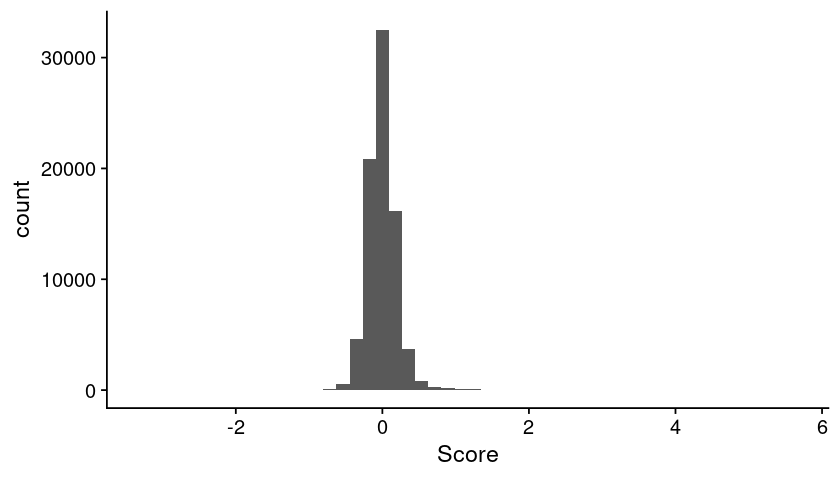

In [5]:
dat = dat_peak_total_crispri_growth
gpt = ggplot(dat, aes(x=Score)) + geom_histogram(bins = 50) + theme_cowplot()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

In [6]:
dat = dat_peak_total_crispri_growth
dat = dat %>% 
    dplyr::mutate(
        CRISPRi_Label = ifelse(
            abs(Score) >= 1,
            "CRISPRi Hit",
            "Background"
    )) %>%
    dplyr::select(Peak, CRISPRi_Label)

dat_peak_label_crispri_growth = dat
print(dim(dat))
head(dat)

[1] 80288     2


Peak,CRISPRi_Label
<chr>,<chr>
chr1:100027983-100029702,Background
chr1:100036871-100039191,Background
chr1:100132370-100133575,Background
chr1:10018625-10019155,Background
chr1:100213080-100213553,Background
chr1:100246767-100247082,Background


In [7]:
dat = dat_peak_atac_fcc_total
lst = split(dat, dat$Assay_Type)

txt = "WSTARR"
dat = lst[[txt]]
dat = dat %>% dplyr::inner_join(dat_peak_label_crispri_growth, by="Peak")

head(dat)

Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label,CRISPRi_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,100027983,100029702,chr1:100027983-100029702,-0.22927538,WSTARR,WSTARR_T,Background
chr1,100036871,100039191,chr1:100036871-100039191,0.96524386,WSTARR,WSTARR_T,Background
chr1,100132370,100133575,chr1:100132370-100133575,1.06097629,WSTARR,WSTARR_T,Background
chr1,10018625,10019155,chr1:10018625-10019155,0.29110113,WSTARR,WSTARR_T,Background
chr1,100213080,100213553,chr1:100213080-100213553,0.09226714,WSTARR,WSTARR_T,Background
chr1,100246767,100247082,chr1:100246767-100247082,-0.46379716,WSTARR,WSTARR_T,Background


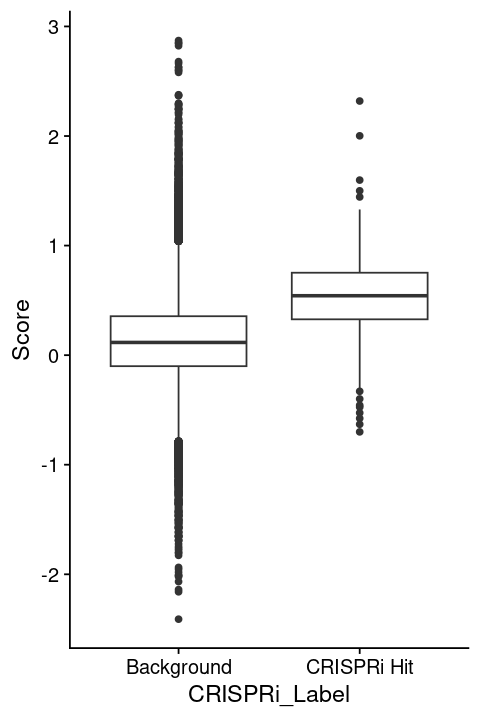

In [8]:
gpt = ggplot(dat, aes(x=CRISPRi_Label, y=Score)) + geom_boxplot() + theme_cowplot()

options(repr.plot.height=6, repr.plot.width=4)
print(gpt)

In [9]:
fun_auroc = function(vec_boo_actual, vec_num_score) {
    ###
    idx = order(vec_num_score)
    vec = vec_boo_actual[idx]
    
    ###
    vec_num_sens = (sum(vec) - cumsum(vec))/sum(vec)
    vec_num_spec = cumsum(!vec)/sum(!vec)
    
    ###
    num_width = diff(c(0, 1 - vec_num_sens))
    num_auc   = sum(vec_num_spec * num_width)

    ### 
    lst = list(
        "Specificity" = vec_num_spec,
        "Sensitivity" = vec_num_sens,
        "AUROC"       = num_auc
    )
    return(lst)
}

In [10]:
dat = bind_rows(dat_peak_atac_fcc_total, dat_peak_atac)

lst = split(dat, dat$Assay_Type)
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "ATAC")
lst = lst[vec]

lst = lapply(lst, function(dat){
    
    #txt = "CRISPRi-HCRFF"
    #vec = paste(txt, c("I", "A"), sep="_")
    vec = c("Background", "CRISPRi Hit")
    dat = dat %>% 
        dplyr::inner_join(dat_peak_label_crispri_growth, by="Peak") %>%     
        dplyr::mutate(CRISPRi_Label = factor(CRISPRi_Label, levels = vec))
    
    fit = glm(CRISPRi_Label ~ Score, data = dat, family = "binomial")
    vec_boo_actual = (dat$CRISPRi_Label == "CRISPRi Hit")
    vec_num_score = predict(fit, type = "response")

    lst = fun_auroc(vec_boo_actual, vec_num_score)
    vec_num_spec = lst[["Specificity"]]
    vec_num_sens = lst[["Sensitivity"]]
    num_auroc    = lst[["AUROC"]]
    txt_assay    = unique(dat$Assay_Type)

    txt_title = paste0("(", round(num_auroc, 2), ")")
    txt_title = paste(txt_assay, txt_title)
    
    dat = data.frame(
        "x" = 1 - lst[["Specificity"]],
        "y" = lst[["Sensitivity"]],
        "Assay" = txt_assay,
        "AUROC" = num_auroc,
        "Performance" = txt_title
    )
    dat = dat %>% dplyr::arrange(x, y)
    return(dat)
})


dat = bind_rows(lst)

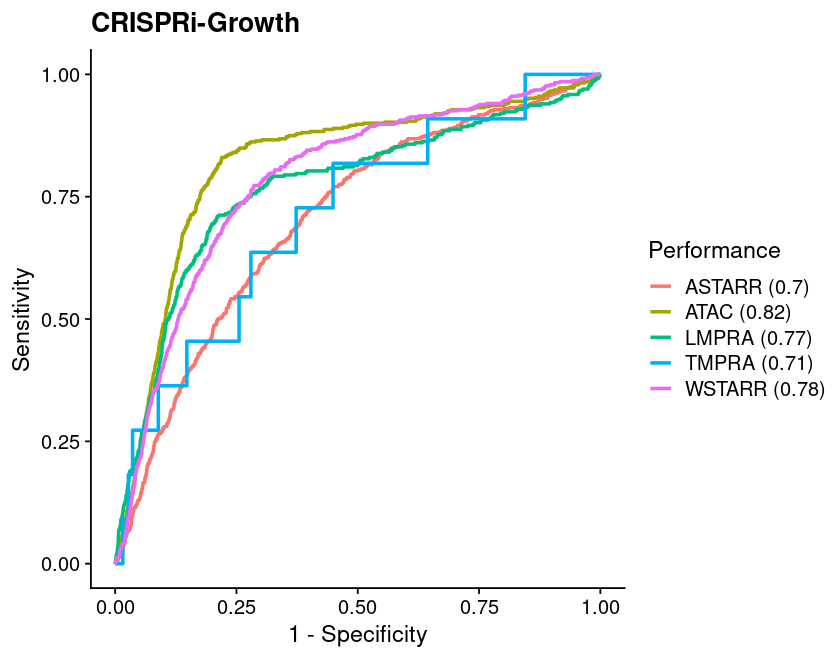

In [11]:
gpt = ggplot(dat, aes(x=x, y=y, group=Assay, color=Performance)) +
    geom_line(linewidth=1) +
    #geom_point() +
    labs(x = "1 - Specificity", y = "Sensitivity", title="CRISPRi-Growth") +
    theme_cowplot()

options(repr.plot.width=7, repr.plot.height=5.5)
print(gpt)

In [12]:
ggsave(filename = "fig.fcc.signal.starrmpra_vs_crispri_growth.png", plot = gpt, height=5.5, width=7, units="in")